# Introduction

This notebook is used to compare the performance of the various models tested. Note that unless otherwise stated, the comparison was done using the NO2 pollutant data.

# Imports

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from air_quality.model import Model
import air_quality.utils as aqutils

In [2]:
# Disable logging of INFO level to prevent pytorch lightning messages.
import logging
logging.disable(20)

In [3]:
POLLUTANTS = ['NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Comparisons

## Model type

In this test we compare the performance of several model types, each set to a configuration identical or close to the Darts default configuration.

In [4]:
def get_models_from_dir(dir_path):
    model_dirs = os.listdir(dir_path)
    models = {}
    for model_dir in model_dirs:
        model = Model.load_model(f"{dir_path}/{model_dir}")
        models[model_dir] = model
    return models

In [5]:
group_dir_path = 'Models comparisons/Model type'

In [6]:
comparison_models = get_models_from_dir(group_dir_path)

/home/jon/miniconda3/envs/aqModels/lib/python3.10/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [7]:
def get_model_choices(comparison_models):
    choices = {}
    for label, model in comparison_models.items():
        covariate_features = {
            'past_covariates' : model.get_past_covariates_features(),
            'future_covariates' : model.get_future_covariates_features()
        }
        choices[label] = {
            **model.get_model_choices(),
            **covariate_features
        }
            
    return pd.DataFrame(choices)

As shown below, the models are set up almost identically - the major difference being which covariates they are able to use.

In [8]:
with pd.option_context('display.max_colwidth', None):
    display(get_model_choices(comparison_models))

,Exponential Smoothing,TCN,Linear Regression,Block RNN LSTM,TFT,NBEATS,Transformer
target_series_names,[NO2],[NO2],[NO2],[NO2],[NO2],[NO2],[NO2]
train_val_data_start,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
train_val_data_end,2021-09-11 06:00:00,2021-09-11 06:00:00,2021-09-11 06:00:00,2021-09-11 06:00:00,2021-09-11 06:00:00,2021-09-11 06:00:00,2021-09-11 06:00:00
early_stopper_patience,5,5,5,5,5,5,5
forecast_horizon,24,24,24,24,24,24,24
max_epochs,25,25,25,25,25,25,25
past_covariates,None,"[dwpt, pres, rhum, temp, wdir, wspd, hour, day_of_week, month]","[dwpt, pres, rhum, temp, wdir, wspd, hour, day_of_week, month]","[dwpt, pres, rhum, temp, wdir, wspd, hour, day_of_week, month]","[dwpt, pres, rhum, temp, wdir, wspd, hour, day_of_week, month]","[dwpt, pres, rhum, temp, wdir, wspd, hour, day_of_week, month]","[dwpt, pres, rhum, temp, wdir, wspd, hour, day_of_week, month]"
future_covariates,None,None,"[DewPointC, cloudcover, humidity, pressure, tempC, winddirDegree, windspeedKmph, hour, day_of_week, month]",None,"[DewPointC, cloudcover, humidity, pressure, tempC, winddirDegree, windspeedKmph, hour, day_of_week, month]",None,None


In [9]:
def get_model_args(comparison_models):
    summaries = []
    for label, model in comparison_models.items():
        summary_series = pd.Series(model.model_args)
        summary_series.name = label
        summaries.append(pd.DataFrame(summary_series))
    return summaries

We can also see the individual model parameters - which are essentially the default settings as per Darts.

In [10]:
for df in get_model_args(comparison_models):
    display(df)

,Exponential Smoothing
Class,ExponentialSmoothing


,TCN
Class,TCNModel
log_tensorboard,False
save_checkpoints,True
input_chunk_length,32
batch_size,32
nr_epochs_val_period,1
dropout,0.1
likelihood,Deterministic
learning_rate,0.001
early_stopper,MeanSquaredError


,Linear Regression
Class,LinearRegressionModel
lags,32
lags_past_covariates,32
lags_future_covariates,True


,Block RNN LSTM
Class,BlockRNNModel
log_tensorboard,False
save_checkpoints,True
input_chunk_length,32
batch_size,32
nr_epochs_val_period,1
likelihood,Deterministic
learning_rate,0.001
early_stopper,MeanSquaredError
model,LSTM


,TFT
Class,TFTModel
log_tensorboard,False
save_checkpoints,True
input_chunk_length,32
batch_size,32
nr_epochs_val_period,1
dropout,0.1
likelihood,Deterministic
learning_rate,0.001
early_stopper,MeanSquaredError


,NBEATS
Class,NBEATSModel
log_tensorboard,False
save_checkpoints,True
input_chunk_length,32
batch_size,32
nr_epochs_val_period,1
dropout,0.1
likelihood,Deterministic
learning_rate,0.001
early_stopper,MeanSquaredError


,Transformer
Class,TransformerModel
log_tensorboard,False
save_checkpoints,True
input_chunk_length,32
batch_size,32
nr_epochs_val_period,1
d_model,128
nhead,32
num_encoder_layers,4
num_decoder_layers,4


For each model, we will take a sample of forecasts over the validation period and calculate the aggregate Mean Absolute Error for each forecast. We'll do that 3 times - once when we are forecasting 1 day only, once with a forecast horizon of 3 days, and once with a forecast horizon of 5 days.

We start by defining a helper function for that.

In [11]:
def get_validation_period_historical_forecast_metrics(
    model,
    pollutant,
    forecast_days,
    stride_days,
    output_type = 'aggregate',
    metrics = ['MAE']
):
    first_validation_day = (
        model.train_data_end + pd.Timedelta(1, 'day')
    ).date().strftime('%Y-%m-%d')
    
    historical_forecasts = model.get_historical_forecast(
        model.target_series_train_val,
        pollutant,
        model.get_best_darts_model(),
        first_validation_day,
        forecast_horizon = forecast_days * 24,
        stride = stride_days * 24
    )
    return model.get_metrics(
        historical_forecasts,
        predict_series = pollutant,
        metrics = metrics,
        output_type = output_type
    )

Now we can examine each of our models. We leave out Exponential Smoothing at this stage because that model needs to be retrained for each forecast, so the process is way too long. We use a stride of 20 days, which results in a sample of 18 evenly-spaced forecasts throughout the validation period.

In [ ]:
%%capture
models_metrics = {}

for forecast_days in [1, 3, 5]:
    
    models_metrics[f"{forecast_days} day"] = {}

    for label, model in comparison_models.items():

        # Skip exponential smoothing as it needs to be retrained for each forecast.
        if label == 'Exponential Smoothing':
            continue

        models_metrics[f"{forecast_days} day"][label] = get_validation_period_historical_forecast_metrics(
            model,
            'NO2',
            forecast_days,
            20
        )

In [ ]:
with open('Models comparisons/Metrics/Model type.pkl', 'wb') as file:
    pickle.dump(models_metrics, file)

In [12]:
with open('Models comparisons/Metrics/Model type.pkl', 'rb') as file:
    models_metrics = pickle.load(file)

The results show that the TFT performs best on 1 and 3 day forecasts, and 3rd best on 5 day forecasts (behind Block RNN LSTM and Transformer).

In [13]:
(
    pd.DataFrame(models_metrics).style
    .highlight_min(color = 'yellow')
    .format("{:.2f}")
)

,1 day,3 day,5 day
TCN,8.89,9.92,10.58
Linear Regression,7.91,9.61,10.50
Block RNN LSTM,8.17,8.63,8.76
TFT,6.83,8.14,8.83
NBEATS,7.93,8.84,8.88
Transformer,7.84,8.76,8.80


### Exponential smoothing comparison

We'll do the same comparison using just the TFT and the Exponential Smoothing model, but with just 3 samples as otherwise the process is too slow.

In [ ]:
%%capture
models_metrics = {}

for forecast_days in [1, 3, 5]:
    
    models_metrics[f"{forecast_days} day"] = {}

    for label in ['TFT', 'Exponential Smoothing']:
        
        model = comparison_models[label]
        
        models_metrics[f"{forecast_days} day"][label] = get_validation_period_historical_forecast_metrics(
            model,
            'NO2',
            forecast_days,
            120
        )

In [ ]:
with open('Models comparisons/Metrics/Exponential Smoothing comparison.pkl', 'wb') as file:
    pickle.dump(models_metrics, file)

In [14]:
with open('Models comparisons/Metrics/Exponential Smoothing comparison.pkl', 'rb') as file:
    models_metrics = pickle.load(file)

The TFT outperforms the Exponential Smoothing model easily.

In [15]:
(
    pd.DataFrame(models_metrics).style
    .highlight_min(color = 'yellow')
    .format("{:.2f}")
)

,1 day,3 day,5 day
TFT,4.72,5.51,5.71
Exponential Smoothing,8.32,10.08,12.58


### Auto ARIMA comparison

Similarly we do a TFT vs Auto ARIMA comparison, but on a smaller dataset as otherwise the Auto ARIMA takes too long to train.

In [16]:
group_dir_path = 'Models comparisons/ARIMA comparison'

In [17]:
comparison_models = get_models_from_dir(group_dir_path)

In [ ]:
%%capture
models_metrics = {}

for forecast_days in [1, 3, 5]:
    
    models_metrics[f"{forecast_days} day"] = {}

    for label, model in comparison_models.items():

        models_metrics[f"{forecast_days} day"][label] = get_validation_period_historical_forecast_metrics(
            model,
            'NO2',
            forecast_days,
            120
        )

In [ ]:
with open('Models comparisons/Metrics/ARIMA comparison.pkl', 'wb') as file:
    pickle.dump(models_metrics, file)

In [18]:
with open('Models comparisons/Metrics/ARIMA comparison.pkl', 'rb') as file:
    models_metrics = pickle.load(file)

In [19]:
(
    pd.DataFrame(models_metrics).style
    .highlight_min(color = 'yellow')
    .format("{:.2f}")
)

,1 day,3 day,5 day
TFT,4.63,4.90,5.10
ARIMA,7.29,6.58,7.94


# Output and input chunks

This comparison looks at using a longer input chunk length (128 vs 32) and output chunk length (120 vs 24). We examine two of the pollutants - NO2 and O3.

In [ ]:
%%capture
pollutant_agg_metrics = {}
for pollutant in ['NO2', 'O3']:
    group_dir_path = f"Models comparisons/Input output lengths/{pollutant}"
    comparison_models = get_models_from_dir(group_dir_path)
    
    models_metrics = {}

    for forecast_days in [1, 3, 5]:

        models_metrics[f"{forecast_days} day"] = {}

        for label, model in comparison_models.items():

            models_metrics[f"{forecast_days} day"][label] = get_validation_period_historical_forecast_metrics(
                model,
                pollutant,
                forecast_days,
                20
            )
            
    pollutant_agg_metrics[pollutant] = models_metrics

In [ ]:
with open('Models comparisons/Metrics/Input output lengths.pkl', 'wb') as file:
    pickle.dump(pollutant_agg_metrics, file)

In [20]:
with open('Models comparisons/Metrics/Input output lengths.pkl', 'rb') as file:
    pollutant_agg_metrics = pickle.load(file)

In [21]:
metrics_dfs = []
for pollutant in ['NO2', 'O3']:
    metric_df = pd.DataFrame(pollutant_agg_metrics[pollutant])
    metric_df['Pollutant'] = pollutant
    metrics_dfs.append(metric_df)
    
aggregate_metrics = (
    pd.concat(metrics_dfs)
    .reset_index()
)
aggregate_metrics.loc[aggregate_metrics['index'] == '5 day', 'index'] = 'Long (128 in, 120 out)'
aggregate_metrics.loc[aggregate_metrics['index'] == '1 day', 'index'] = 'Short (32 in, 24 out)'

agg_metrics_result = (
    aggregate_metrics
    .rename(columns = {'index' : 'Input Output'})
    .pivot_table(
        index = ['Pollutant', 'Input Output']
    )
)
display(
    agg_metrics_result.style
    .format("{:.2f}")
)

# Simultaneous vs separate

### Simultaneous

In [22]:
simultaneous_model = Model.load_model(
    'Models comparisons/Simultaneous series training vs individual/Simultaneous')

In [24]:
%%capture
simultaneous_model_metrics = {}
for pollutant in POLLUTANTS:
    simultaneous_model_metrics[pollutant] = {}
    for forecast_days in [1, 3, 5]:
        simultaneous_model_metrics[pollutant][forecast_days] = \
            get_validation_period_historical_forecast_metrics(
                simultaneous_model,
                pollutant,
                forecast_days,
                20
            )

In [25]:
simultaneous_df = pd.DataFrame(simultaneous_model_metrics)
simultaneous_df['Model Type'] = 'Simultaneous'

### Individual

In [26]:
%%capture
individual_model_metrics = {}
for pollutant in POLLUTANTS:
    individual_model = Model.load_model(
        f"Models comparisons/Simultaneous series training vs individual/Individual/{pollutant}")
    individual_model_metrics[pollutant] = {}
    for forecast_days in [1, 3, 5]:
        individual_model_metrics[pollutant][forecast_days] = \
            get_validation_period_historical_forecast_metrics(
                individual_model,
                pollutant,
                forecast_days,
                20
            )

In [27]:
individual_df = pd.DataFrame(individual_model_metrics)
individual_df['Model Type'] = 'Individual'

### Comparison simultaneous vs individual

In [28]:
comparison_model_metrics = (
    pd.concat([simultaneous_df, individual_df])
    .reset_index()
    .rename(columns = {'index' : 'Forecast Days'})
    .pivot_table(
        index = ['Forecast Days', 'Model Type']
    )
)

In [29]:
with open('Models comparisons/Metrics/Simultaneous vs individual.pkl', 'wb') as file:
    pickle.dump(pollutant_agg_metrics, file)

In [30]:
with open('Models comparisons/Metrics/Simultaneous vs individual.pkl', 'rb') as file:
    pollutant_agg_metrics = pickle.load(file)

In [31]:
(
    comparison_model_metrics.style
    .format("{:.2f}")
)

# Final model validation performance

Here we look at the performance of the final model(s) over validation to give an indication of likely production performance. NO2 and O3 are the best performers, while PM2.5 and SO2 are the worst.

In [32]:
group_dir_path = 'Models comparisons/Final models'

In [33]:
comparison_models = get_models_from_dir(group_dir_path)

In [34]:
comparison_models = {}
final_model_metrics = {}
for pollutant in POLLUTANTS:
    comparison_models[pollutant] = Model.load_model(
        f"Models comparisons/Final models/{pollutant}"
    )

In [35]:
%%capture
models_metrics = {}

for pollutant, model in comparison_models.items():

    models_metrics[pollutant] = {}

    for forecast_days in [1, 3, 5]:

        models_metrics[pollutant][forecast_days] = get_validation_period_historical_forecast_metrics(
            model,
            pollutant,
            forecast_days,
            20,
            metrics = ['MAPE', 'MAE'],
            output_type = 'both'
        )

In [36]:
with open('Models comparisons/Metrics/Final models.pkl', 'wb') as file:
    pickle.dump(models_metrics, file)

In [37]:
with open('Models comparisons/Metrics/Final models.pkl', 'rb') as file:
    models_metrics = pickle.load(file)

In [38]:
individual_metric_dfs, aggregate_metric_dfs = [], []
for pollutant, model_metrics in models_metrics.items():
    for forecast_days, metrics_by_day in model_metrics.items():
        agg_metrics_df = pd.DataFrame(metrics_by_day).drop(labels = 'individual').melt(
            var_name = 'Metric',
            value_name = 'Value'
        )
        agg_metrics_df['Forecast'] = forecast_days
        agg_metrics_df['Pollutant'] = pollutant
        aggregate_metric_dfs.append(agg_metrics_df)
        
        for metric_type, metrics in metrics_by_day.items():
            individual_metrics_df = pd.DataFrame(metrics['individual']).rename(columns = {0 : 'Value'})
            individual_metrics_df['Sample'] = range(0, 20 * len(individual_metrics_df), 20)
            individual_metrics_df['Forecast'] = forecast_days
            individual_metrics_df['Metric'] = metric_type
            individual_metrics_df['Pollutant'] = pollutant
            individual_metric_dfs.append(individual_metrics_df)
            
individual_metrics = pd.concat(individual_metric_dfs).reset_index(drop = True)
aggregate_metrics = pd.concat(aggregate_metric_dfs).reset_index(drop = True)

In [39]:
aggregate_metrics.pivot_table(
    index = ['Metric', 'Forecast'],
    columns = 'Pollutant',
    values = 'Value'
)

Pollutant              NO2         O3       PM10      PM2.5        SO2
Metric Forecast                                                       
MAE    1          6.581327  11.307732   5.173576   3.680301   0.681684
       3          6.317572  12.052907   5.498615   3.438949   0.667204
       5          6.920219  12.931867   6.402006   3.874924   0.673109
MAPE   1         34.875828  29.863486  36.202206  65.337802  67.654325
       3         39.594281  31.150878  39.805702  76.990228  86.946638
       5         42.069552  43.109635  47.202504  82.775766  82.268682

In [40]:
mape_individual_metrics = individual_metrics[individual_metrics['Metric'] == 'MAPE']

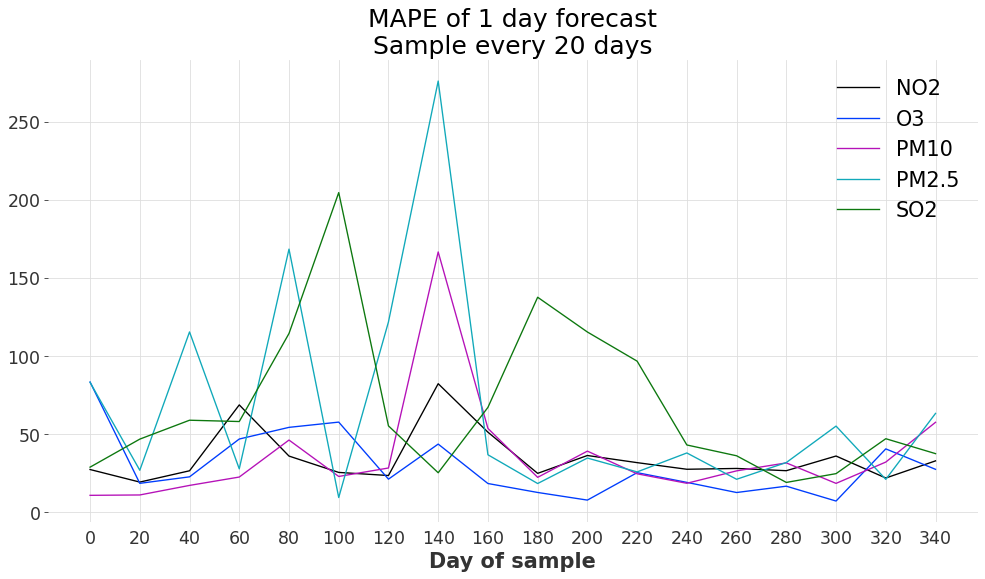

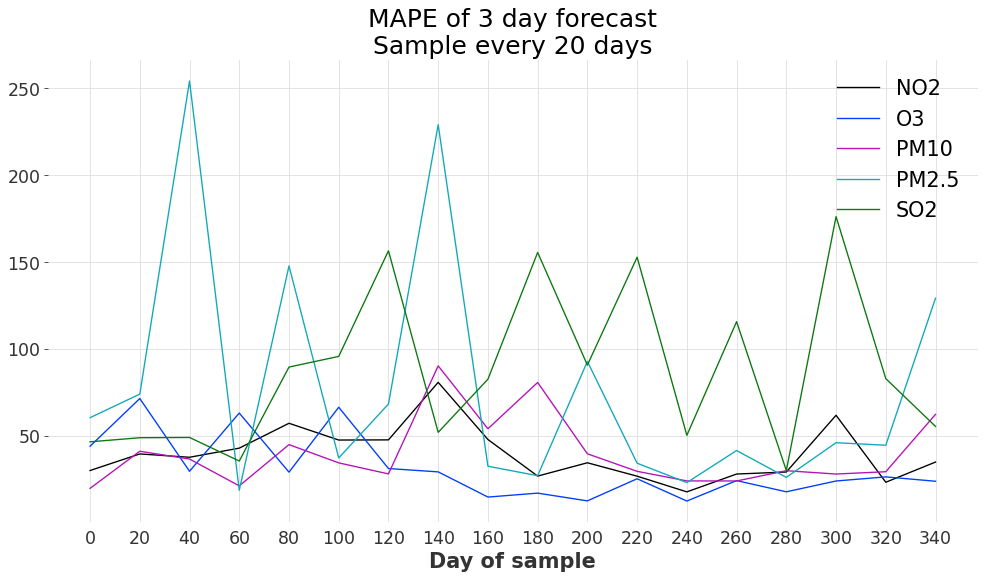

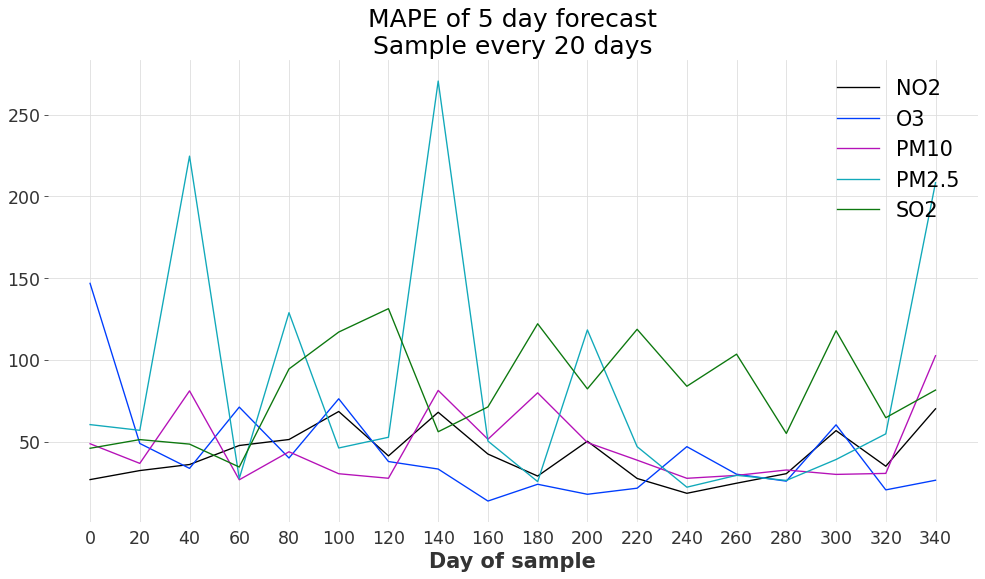

In [43]:
img_save_path = 'Models comparisons/Metrics/Final models plots'

plt.rc('font', size = 20)
fig_params = {'figsize' : (16, 8)}

for lang in ['en', 'fr']:

    for size in ['wide', 'narrow']:
        fig_params['figsize'] = (16, 8) if size == 'wide' else (8, 8)
        fig_params['dpi'] = 75.0 if size == 'wide' else 85.0
        tick_interval = 20 if size == 'wide' else 40
        for forecast_days in individual_metrics['Forecast'].unique():
            plt.figure(**fig_params)
            for pollutant in individual_metrics['Pollutant'].unique():
                plot_data = mape_individual_metrics[
                    (mape_individual_metrics['Forecast'] == forecast_days) & 
                    (mape_individual_metrics['Pollutant'] == pollutant)
                ]
                plt.plot(
                    plot_data['Sample'], plot_data['Value'],
                    label = f"{pollutant}"
                )
            plt.xticks(np.arange(min(plot_data['Sample']), max(plot_data['Sample'])+1, tick_interval))
            if lang == 'en':
                title_text = f"MAPE of {forecast_days} day forecast\nSample every 20 days"
                x_axis_label = 'Day of sample'
            else:
                days_text = "jour" if forecast_days == 1 else "jours"
                title_text = f"MAPE de prédiction de {forecast_days} {days_text}\nEchantillon tous les 20 jours"
                x_axis_label = "Jour d'échantillon"
                
            plt.title(title_text)
            plt.xlabel(x_axis_label)
            plt.legend(loc = 'upper right')
            plt.savefig(f"{img_save_path}/final-model-performance-{forecast_days}-days-{lang}-{size}.png")
            if lang == 'en' and size == 'wide':
                plt.show()
            plt.close()

# Covariates impact

This comparison looks at the impact of including or excluding past covariates, and which covariates to include (time or data). The clear winner is to include past covariates and use both time and data.

In [44]:
group_dir_path = 'Models comparisons/TFT features'
comparison_models = get_models_from_dir(group_dir_path)

In [ ]:
%%capture
models_metrics = {}

for forecast_days in [1, 3, 5]:
    
    models_metrics[f"{forecast_days} day"] = {}

    for label, model in comparison_models.items():

        models_metrics[f"{forecast_days} day"][label] = get_validation_period_historical_forecast_metrics(
            model,
            'NO2',
            forecast_days,
            120
        )

In [ ]:
with open('Models comparisons/Metrics/TFT features.pkl', 'wb') as file:
    pickle.dump(models_metrics, file)

In [45]:
with open('Models comparisons/Metrics/TFT features.pkl', 'rb') as file:
    models_metrics = pickle.load(file)

In [46]:
(
    pd.DataFrame(models_metrics).style
    .highlight_min(color = 'yellow')
    .format("{:.2f}")
)

,1 day,3 day,5 day
Data Future only,5.56,6.59,7.02
Data,6.77,6.56,6.86
Time,7.87,9.57,9.52
Time Future only,7.90,9.44,9.00
Time and data,5.48,5.30,5.58
